In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


In [68]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x * 255)
])

data_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
data_test = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(data_train, batch_size=32, shuffle=True)
test_loader = DataLoader(data_test, batch_size=32, shuffle=False)


In [69]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28 * 3, 14)
        self.fc2 = nn.Linear(14, 12)
        self.fc3 = nn.Linear(12, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [70]:

model_path = 'cnn_model.pth'

try:
    model.load_state_dict(torch.load(model_path))
    print(f"Model loaded successfully from {model_path}")
except FileNotFoundError:
    print(f"Error: File {model_path} not found.")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully from cnn_model.pth


<ipython-input-70-806e4055aa37>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [71]:
model.fc1.bias.shape

torch.Size([14])

In [82]:

def train_model(model, train_loader, criterion, optimizer, epochs=15):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")



In [576]:
# def evaluate_model(model, test_loader):
#     model.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in test_loader:
#             outputs = model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     print(f"Test Accuracy: {100 * correct / total:.2f}%")

# train_model(model, train_loader, criterion, optimizer, epochs=15)
# evaluate_model(model, test_loader)


In [13]:
def show_model_parameters(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"Layer: {name}")
            print(f"Parameter Shape: {param.shape}")
            print(f"Values: {param.data}\n")

show_model_parameters(model)


Layer: conv1.weight
Parameter Shape: torch.Size([3, 1, 3, 3])
Values: tensor([[[[-0.0846,  0.1639,  0.0037],
          [ 0.1250, -0.0289,  0.0038],
          [-0.2860, -0.0211, -0.1984]]],


        [[[-0.0597, -0.2008, -0.0153],
          [-0.4078,  0.2334,  0.1158],
          [-0.1227, -0.1852,  0.1039]]],


        [[[-0.0044, -0.3596, -0.1779],
          [-0.1264,  0.3656, -0.3573],
          [ 0.1006,  0.0527, -0.0028]]]])

Layer: conv1.bias
Parameter Shape: torch.Size([3])
Values: tensor([-0.0077, -0.2414, -0.0298])

Layer: fc1.weight
Parameter Shape: torch.Size([14, 2352])
Values: tensor([[-0.0793, -0.0973, -0.0851,  ...,  0.0175,  0.0191,  0.0419],
        [-0.0308, -0.0179, -0.0190,  ..., -0.2216, -0.2352, -0.2214],
        [ 0.0450,  0.0337,  0.0587,  ...,  0.0356,  0.0067,  0.0269],
        ...,
        [ 0.0120, -0.0074,  0.0274,  ..., -0.0578, -0.0571, -0.0302],
        [-0.0034,  0.0312,  0.0244,  ...,  0.0818,  0.0791,  0.0582],
        [-0.0091, -0.0211,  0.0039,  ..., 

In [138]:
import os

os.makedirs("model_parameters", exist_ok=True)

def save_layer_parameters(layer, layer_name):
    weights_file = f"model_parameters/{layer_name}_weights.txt"
    with open(weights_file, "w") as f:
        f.write(str(layer.weight.data.numpy()))

    biases_file = f"model_parameters/{layer_name}_biases.txt"
    with open(biases_file, "w") as f:
        f.write(str(layer.bias.data.numpy()))

save_layer_parameters(model.conv1, "conv1")
save_layer_parameters(model.fc1, "fc1")
save_layer_parameters(model.fc2, "fc2")
save_layer_parameters(model.fc3, "fc3")

print("Weights and biases have been saved in the 'model_parameters' folder.")


Weights and biases have been saved in the 'model_parameters' folder.


In [137]:

dataiter = iter(test_loader)
images, labels = next(dataiter)

sample_image = images[12].unsqueeze(0)
sample_image_array = sample_image.squeeze(0).numpy()

Input Image as a 28x28 Array:
[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   

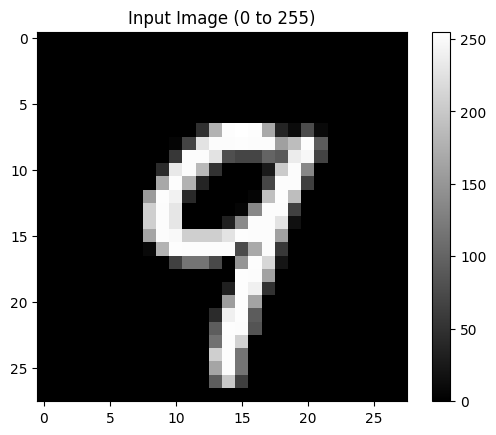

Raw Output (Logits):
tensor([[ -8.2090,  -8.3009, -11.2110,  -0.3989,  11.1993,  -3.1878, -23.1433,
           4.8206,   5.1284,  23.0423]])
Predicted Label: 9


In [136]:
sample_image = images[12].unsqueeze(0)
sample_image_array = sample_image.squeeze(0).numpy()

print("Input Image as a 28x28 Array:")
print(sample_image_array)

plt.imshow(sample_image_array.squeeze(), cmap="gray")
plt.title("Input Image (0 to 255)")
plt.colorbar()
plt.show()

with torch.no_grad():
    output = model(sample_image)

print("Raw Output (Logits):")
print(output)

_, predicted_label = torch.max(output, 1)
print(f"Predicted Label: {predicted_label.item()}")

In [135]:
sample_image

tensor([[[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0

In [134]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

sample_image = images[12].unsqueeze(0)

sample_image_array = sample_image.squeeze().numpy()

print("Input Image as a C++ array:")
print("const unsigned char sample_image_data[28][28] = {")
for i in range(28):
    print("{", end="")
    for j in range(28):
        print(f"{int(sample_image_array[i][j])},", end="")
    print("},")
print("};")

Input Image as a C++ array:
const unsigned char sample_image_data[28][28] = {
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,0,0,49,180,253,255,253,169,36,11,76,9,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,5,68,228,252,252,253,252,252,160,189,253,92,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,0,55,252,252,227,79,69,69,100,90,236,247,67,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,43,233,252,185,50,0,0,0,26,203,252,135,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,0,168,253,178,37,0,0,0,0,70,252,252,63,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,155,253,242,42,0,0,0,0,5,191,253,190,0,0,0,0,0,0,0,0,},
{0,0,0,0,0,0,0,0,207,252,230,0,0,0,0,5,136,252,25

Shape of the convolutional layer output: (3, 28, 28)


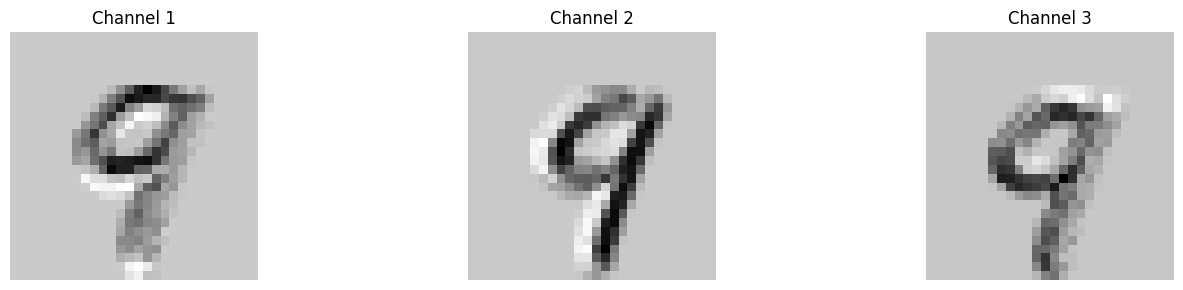

tensor([[[[-0.0077, -0.0077, -0.0077,  ..., -0.0077, -0.0077, -0.0077],
          [-0.0077, -0.0077, -0.0077,  ..., -0.0077, -0.0077, -0.0077],
          [-0.0077, -0.0077, -0.0077,  ..., -0.0077, -0.0077, -0.0077],
          ...,
          [-0.0077, -0.0077, -0.0077,  ..., -0.0077, -0.0077, -0.0077],
          [-0.0077, -0.0077, -0.0077,  ..., -0.0077, -0.0077, -0.0077],
          [-0.0077, -0.0077, -0.0077,  ..., -0.0077, -0.0077, -0.0077]],

         [[-0.2414, -0.2414, -0.2414,  ..., -0.2414, -0.2414, -0.2414],
          [-0.2414, -0.2414, -0.2414,  ..., -0.2414, -0.2414, -0.2414],
          [-0.2414, -0.2414, -0.2414,  ..., -0.2414, -0.2414, -0.2414],
          ...,
          [-0.2414, -0.2414, -0.2414,  ..., -0.2414, -0.2414, -0.2414],
          [-0.2414, -0.2414, -0.2414,  ..., -0.2414, -0.2414, -0.2414],
          [-0.2414, -0.2414, -0.2414,  ..., -0.2414, -0.2414, -0.2414]],

         [[-0.0298, -0.0298, -0.0298,  ..., -0.0298, -0.0298, -0.0298],
          [-0.0298, -0.0298, -

In [577]:

conv_output = model.conv1(sample_image)

conv_output_array = conv_output.squeeze(0).detach().numpy()

print("Shape of the convolutional layer output:", conv_output_array.shape)

num_channels = conv_output_array.shape[0]
fig, axes = plt.subplots(1, num_channels, figsize=(15, 3))

for i in range(num_channels):
    axes[i].imshow(conv_output_array[i], cmap='gray')
    axes[i].set_title(f"Channel {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
print(conv_output)

In [140]:
x = model.relu(model.conv1(sample_image))
x[0,0,:,:]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

First Channel Output:
[[-7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03]
 [-7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03
  -7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7.66956573e-03]
 [-7.66956573e-03 -7.66956573e-03 -7.66956573e-03 -7

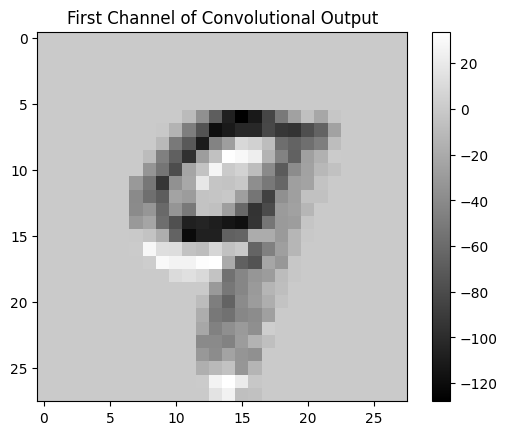

In [141]:


conv_output = model.conv1(sample_image)

first_channel = conv_output[0, 0, :, :]

first_channel_np = first_channel.detach().numpy()

print("First Channel Output:")
print(first_channel_np)

import matplotlib.pyplot as plt
plt.imshow(first_channel_np, cmap='gray')
plt.title("First Channel of Convolutional Output")
plt.colorbar()
plt.show()

In [22]:
first_channel.shape

torch.Size([28, 28])

In [578]:
fc1_output = model.fc1(model.flatten(model.relu(model.conv1(sample_image))))
print("Outputs after the first fully connected layer (fc1):")
fc1_output

Outputs after the first fully connected layer (fc1):


tensor([[  47.7745,   86.1094,  -97.4630,   46.6618, -141.3577,   54.7832,
           54.1561,  114.1214,  -66.5749,  -57.7125,   60.5681, -138.2976,
          106.8612,  -30.4745]], grad_fn=<AddmmBackward0>)

In [143]:
fc1_output.shape

torch.Size([1, 14])

In [144]:
fc1_weights = model.fc1.weight.data.numpy()

num_rows = fc1_weights.shape[0]
num_cols = fc1_weights.size // num_rows

reshaped_weights = fc1_weights.reshape(num_rows, num_cols)

print("const float fc1_weights[{}][{}] = {{".format(num_rows, num_cols))
for i in range(num_rows):
    print("{", end="")
    for j in range(num_cols):
        print(f"{reshaped_weights[i, j]:.8f}, ", end="")
    print("},")
print("};")

const float fc1_weights[14][2352] = {
{-0.07934903, -0.09732777, -0.08507064, -0.08649603, -0.08640163, -0.08072141, -0.11401567, -0.10022956, -0.10620748, -0.09526779, -0.08020538, -0.10843895, -0.10633439, -0.08231640, -0.10148776, -0.08606841, -0.12466241, -0.10586230, -0.09443906, -0.10646108, -0.07846609, -0.10334803, -0.10583474, -0.10054387, -0.10753292, -0.11452721, -0.08292563, -0.08633727, -0.07752810, -0.09506376, -0.09623946, -0.07676376, -0.11366042, -0.07576650, -0.09834525, -0.08482867, -0.11788332, -0.10242915, -0.11393745, -0.08594190, -0.07093608, -0.09312613, -0.02103192, -0.09508225, -0.12170298, -0.10559090, -0.14521967, -0.09995431, -0.09122135, -0.12457587, -0.12013799, -0.10190631, -0.08308585, -0.09159404, -0.09218314, -0.11134771, -0.10137583, -0.07491393, -0.08023977, -0.10320124, -0.09443595, -0.08037393, -0.11947988, -0.05571438, -0.07015959, 0.07765266, -0.14334174, -0.10522757, 0.00922696, 0.10343146, 0.04079938, -0.25839701, -0.28835151, -0.26012275, -0.

In [145]:
fc1_weights = model.fc1.weight.data.numpy()

num_rows = fc1_weights.shape[0]
num_cols = fc1_weights.shape[1]

reshaped_weights = fc1_weights.reshape(num_rows, num_cols)

with open("fc1_weights.txt", "w") as f:
    f.write(f"const float fc1_weights[{num_rows}][{num_cols}] = {{\n")
    for i in range(num_rows):
        f.write("{\n")
        for j in range(num_cols):
            f.write(f"{reshaped_weights[i, j]:.8f}, ")
        f.write("},\n")
    f.write("};\n")

print("Weights and biases have been saved in the 'model_parameters' folder.")

Weights and biases have been saved in the 'model_parameters' folder.


In [146]:

fc1_output = model.relu(model.fc1(model.flatten(model.relu(model.conv1(sample_image)))))
fc1_output

tensor([[ 47.7745,  86.1094,   0.0000,  46.6618,   0.0000,  54.7832,  54.1561,
         114.1214,   0.0000,   0.0000,  60.5681,   0.0000, 106.8612,   0.0000]],
       grad_fn=<ReluBackward0>)

In [579]:

fc2_output =model.fc2(model.relu(model.fc1(model.flatten(model.relu(model.conv1(sample_image))))))
print("Outputs after the second fully connected layer (fc2):")
fc2_output

Outputs after the second fully connected layer (fc2):


tensor([[-41.5766, -35.8263,  20.7333,  67.4531, -52.2863, -19.4050,   0.9667,
         -10.4274,   6.4679,  14.4211,  39.6023, -60.3128]],
       grad_fn=<AddmmBackward0>)

In [148]:
fc2_output.shape

torch.Size([1, 12])

In [149]:
fc3_output = model.fc3(model.relu(model.fc2(model.relu(model.fc1(model.flatten(model.relu(model.conv1(sample_image))))))))
print("Outputs after the third fully connected layer (fc3):")
print(fc3_output)

Outputs after the third fully connected layer (fc3):
tensor([[ -8.2090,  -8.3009, -11.2110,  -0.3989,  11.1993,  -3.1878, -23.1433,
           4.8206,   5.1284,  23.0423]], grad_fn=<AddmmBackward0>)


In [150]:
model(sample_image)

tensor([[ -8.2090,  -8.3009, -11.2110,  -0.3989,  11.1993,  -3.1878, -23.1433,
           4.8206,   5.1284,  23.0423]], grad_fn=<AddmmBackward0>)

In [595]:
truncated_model(sample_image)

tensor([[-4.1825, -1.9946, -6.0270, -1.7381,  4.0342, -0.1354, -8.7225,  2.2501,
          1.2658,  6.9322]], grad_fn=<AddmmBackward0>)

In [152]:
fc3_output.shape

torch.Size([1, 10])

In [575]:
import time

start_time = time.time()
with torch.no_grad():
    output = truncated_model(sample_image)
end_time = time.time()

inference_time = end_time - start_time

print(f"Inference time for sample_image: {inference_time} seconds")

Inference time for sample_image: 0.0014052391052246094 seconds


In [590]:
start_time = time.time()
with torch.no_grad():
    output = model(sample_image)
end_time = time.time()
inference_time = end_time - start_time

In [591]:
inference_time

0.0020737648010253906

In [593]:
start_time = time.time()
with torch.no_grad():
    output = truncated_model(sample_image)
end_time = time.time()
inference_time = end_time - start_time

In [594]:
inference_time

0.0024445056915283203

In [156]:
torch.save(model.state_dict(), 'cnn_model.pth')
print("Model saved successfully!")


Model saved successfully!


In [157]:
model.fc1.weight

Parameter containing:
tensor([[-0.0793, -0.0973, -0.0851,  ...,  0.0175,  0.0191,  0.0419],
        [-0.0308, -0.0179, -0.0190,  ..., -0.2216, -0.2352, -0.2214],
        [ 0.0450,  0.0337,  0.0587,  ...,  0.0356,  0.0067,  0.0269],
        ...,
        [ 0.0120, -0.0074,  0.0274,  ..., -0.0578, -0.0571, -0.0302],
        [-0.0034,  0.0312,  0.0244,  ...,  0.0818,  0.0791,  0.0582],
        [-0.0091, -0.0211,  0.0039,  ...,  0.1038,  0.1164,  0.1229]],
       requires_grad=True)

In [158]:
import numpy as np


weights = model.fc1.weight
with open('cpp_array1.txt', 'w') as f:
    f.write("const float my_array = {\n")

    for i in range(weights.shape[0]):
        row = ', '.join(f"{x:.8e}" for x in weights[i])
        f.write("    {" + row + "}")

        if i != weights.shape[0] - 1:
            f.write(",\n")
        else:
            f.write("\n")
    f.write("};\n")

print("C++ array written to cpp_array.txt")

C++ array written to cpp_array.txt


In [171]:
def weights_to_cpp_array_tensor(layer_weights):

    cpp_array = f"const float fc1_weights[{layer_weights.size(0)}][{layer_weights.size(1)}] = {{\n"

    for i, row in enumerate(layer_weights):
        row_data = ", ".join(f"{x.item():.6f}" for x in row)
        if i < layer_weights.size(0) - 1:
            cpp_array += f"    {{ {row_data} }},\n"
        else:
            cpp_array += f"    {{ {row_data} }}\n"

    cpp_array += "};"
    return cpp_array


In [525]:
    import copy
    truncated_model = copy.deepcopy(model)

In [526]:

evaluate_model(truncated_model, test_loader)
evaluate_model(model, test_loader)


Test Accuracy: 96.90%
Test Accuracy: 96.90%


In [527]:
def truncate_(tensor):
    return torch.floor(tensor * (2**5)) / (2**5)

In [528]:
conv1_trncated = truncate_(truncated_model.conv1.weight)

In [580]:
truncated_model.conv1.weight = torch.nn.Parameter(conv1_trncated)

In [530]:
conv1_bias_trncated = truncate_(truncated_model.conv1.bias)

In [531]:
truncated_model.conv1.bias = torch.nn.Parameter(conv1_bias_trncated)

In [532]:
truncated_model.conv1.bias.tolist()

[-0.03125, -0.25, -0.03125]

In [533]:
x = model.conv1.bias

In [534]:
fc1_weight_trncated = truncate_(truncated_model.fc1.weight)

In [535]:
truncated_model.fc1.weight = torch.nn.Parameter(fc1_weight_trncated)

In [536]:
fc1_bias_trncated = truncate_(truncated_model.fc1.bias)

In [537]:
truncated_model.fc1.bias = torch.nn.Parameter(fc1_bias_trncated)

In [538]:
truncated_model.fc1.bias.tolist()

[0.03125,
 -0.125,
 0.28125,
 0.0625,
 0.09375,
 -0.0625,
 0.125,
 -0.125,
 0.03125,
 -0.21875,
 -0.0625,
 -0.125,
 0.09375,
 -0.09375]

In [539]:
model.fc1.bias.tolist()

[0.054119475185871124,
 -0.12143506854772568,
 0.2905239760875702,
 0.09284428507089615,
 0.0989779680967331,
 -0.0596078559756279,
 0.14617709815502167,
 -0.10569984465837479,
 0.0406317301094532,
 -0.19749502837657928,
 -0.05599609762430191,
 -0.10698398947715759,
 0.1127256453037262,
 -0.06349904090166092]

In [540]:
fc2_weight_trncated = truncate_(truncated_model.fc2.weight)

In [541]:
truncated_model.fc2.weight = torch.nn.Parameter(fc2_weight_trncated)

In [542]:
fc2_bias_trncated = truncate_(truncated_model.fc2.bias)

In [543]:
truncated_model.fc2.bias = torch.nn.Parameter(fc2_bias_trncated)

In [587]:
truncated_model.fc3.bias.tolist()

[-0.25,
 1.0625,
 -0.40625,
 0.71875,
 -0.21875,
 -0.09375,
 -1.53125,
 -0.09375,
 0.1875,
 -0.0625]

In [581]:
model.fc3.bias.tolist()

[-0.24971696734428406,
 1.0750676393508911,
 -0.3813229501247406,
 0.739291787147522,
 -0.1910531371831894,
 -0.08148735761642456,
 -1.5209436416625977,
 -0.08819516748189926,
 0.20864646136760712,
 -0.058155059814453125]

In [545]:
fc3_weight_trncated = truncate_(truncated_model.fc3.weight)

In [546]:
truncated_model.fc3.weight = torch.nn.Parameter(fc3_weight_trncated)

In [547]:
fc3_bias_trncated = truncate_(truncated_model.fc3.bias)

In [548]:
truncated_model.fc3.bias = torch.nn.Parameter(fc3_bias_trncated)

In [583]:
evaluate_model(model, test_loader)


Test Accuracy: 96.90%


In [584]:
evaluate_model(truncated_model, test_loader)


Test Accuracy: 91.98%


In [550]:
truncated_model(sample_image)

tensor([[-4.1825, -1.9946, -6.0270, -1.7381,  4.0342, -0.1354, -8.7225,  2.2501,
          1.2658,  6.9322]], grad_fn=<AddmmBackward0>)

In [551]:
weights_to_cpp_array_tensor(model.fc1.weight)

'const float fc1_weights[14][2352] = {\n    { -0.079349, -0.097328, -0.085071, -0.086496, -0.086402, -0.080721, -0.114016, -0.100230, -0.106207, -0.095268, -0.080205, -0.108439, -0.106334, -0.082316, -0.101488, -0.086068, -0.124662, -0.105862, -0.094439, -0.106461, -0.078466, -0.103348, -0.105835, -0.100544, -0.107533, -0.114527, -0.082926, -0.086337, -0.077528, -0.095064, -0.096239, -0.076764, -0.113660, -0.075767, -0.098345, -0.084829, -0.117883, -0.102429, -0.113937, -0.085942, -0.070936, -0.093126, -0.021032, -0.095082, -0.121703, -0.105591, -0.145220, -0.099954, -0.091221, -0.124576, -0.120138, -0.101906, -0.083086, -0.091594, -0.092183, -0.111348, -0.101376, -0.074914, -0.080240, -0.103201, -0.094436, -0.080374, -0.119480, -0.055714, -0.070160, 0.077653, -0.143342, -0.105228, 0.009227, 0.103431, 0.040799, -0.258397, -0.288352, -0.260123, -0.299646, -0.150733, -0.179927, -0.130197, -0.203781, -0.148611, -0.159745, 0.030856, -0.110308, -0.096394, -0.105603, -0.076537, -0.094576, -0

In [563]:
weights_to_cpp_array_tensor(truncated_model.fc1.weight)

'const float fc1_weights[14][2352] = {\n    { -0.093750, -0.125000, -0.093750, -0.093750, -0.093750, -0.093750, -0.125000, -0.125000, -0.125000, -0.125000, -0.093750, -0.125000, -0.125000, -0.093750, -0.125000, -0.093750, -0.125000, -0.125000, -0.125000, -0.125000, -0.093750, -0.125000, -0.125000, -0.125000, -0.125000, -0.125000, -0.093750, -0.093750, -0.093750, -0.125000, -0.125000, -0.093750, -0.125000, -0.093750, -0.125000, -0.093750, -0.125000, -0.125000, -0.125000, -0.093750, -0.093750, -0.093750, -0.031250, -0.125000, -0.125000, -0.125000, -0.156250, -0.125000, -0.093750, -0.125000, -0.125000, -0.125000, -0.093750, -0.093750, -0.093750, -0.125000, -0.125000, -0.093750, -0.093750, -0.125000, -0.125000, -0.093750, -0.125000, -0.062500, -0.093750, 0.062500, -0.156250, -0.125000, 0.000000, 0.093750, 0.031250, -0.281250, -0.312500, -0.281250, -0.312500, -0.156250, -0.187500, -0.156250, -0.218750, -0.156250, -0.187500, 0.000000, -0.125000, -0.125000, -0.125000, -0.093750, -0.125000, -0

In [553]:
truncated_model.fc1.weight.tolist()

[[-0.09375,
  -0.125,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.125,
  -0.125,
  -0.125,
  -0.125,
  -0.09375,
  -0.125,
  -0.125,
  -0.09375,
  -0.125,
  -0.09375,
  -0.125,
  -0.125,
  -0.125,
  -0.125,
  -0.09375,
  -0.125,
  -0.125,
  -0.125,
  -0.125,
  -0.125,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.125,
  -0.125,
  -0.09375,
  -0.125,
  -0.09375,
  -0.125,
  -0.09375,
  -0.125,
  -0.125,
  -0.125,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.03125,
  -0.125,
  -0.125,
  -0.125,
  -0.15625,
  -0.125,
  -0.09375,
  -0.125,
  -0.125,
  -0.125,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.125,
  -0.125,
  -0.09375,
  -0.09375,
  -0.125,
  -0.125,
  -0.09375,
  -0.125,
  -0.0625,
  -0.09375,
  0.0625,
  -0.15625,
  -0.125,
  0.0,
  0.09375,
  0.03125,
  -0.28125,
  -0.3125,
  -0.28125,
  -0.3125,
  -0.15625,
  -0.1875,
  -0.15625,
  -0.21875,
  -0.15625,
  -0.1875,
  0.0,
  -0.125,
  -0.125,
  -0.125,
  -0.09375,
  -0.125,
  -0.125,
  -0.09375,
  -0.09375,
  -0.0625,
  0.125,
  0

In [555]:
truncated_model.conv1.weight.tolist()

[[[[-0.09375, 0.15625, 0.0],
   [0.09375, -0.03125, 0.0],
   [-0.3125, -0.03125, -0.21875]]],
 [[[-0.0625, -0.21875, -0.03125],
   [-0.4375, 0.21875, 0.09375],
   [-0.125, -0.1875, 0.09375]]],
 [[[-0.03125, -0.375, -0.1875],
   [-0.15625, 0.34375, -0.375],
   [0.09375, 0.03125, -0.03125]]]]

In [557]:
truncated_model.conv1.bias.tolist()

[-0.03125, -0.25, -0.03125]

In [ ]:
truncated_model.fc1.weight.tolist()

In [564]:
truncated_model.fc1.bias.tolist()

[0.03125,
 -0.125,
 0.28125,
 0.0625,
 0.09375,
 -0.0625,
 0.125,
 -0.125,
 0.03125,
 -0.21875,
 -0.0625,
 -0.125,
 0.09375,
 -0.09375]

In [565]:
weights_to_cpp_array_tensor(truncated_model.fc2.weight)

'const float fc1_weights[12][14] = {\n    { 0.093750, 0.187500, -0.312500, -0.375000, 0.250000, 0.000000, -0.125000, -0.312500, 0.125000, -0.031250, 0.218750, 0.093750, -0.218750, -0.156250 },\n    { -0.281250, -0.218750, 0.093750, -0.125000, 0.062500, 0.093750, 0.156250, -0.250000, -0.187500, 0.125000, 0.093750, -0.312500, 0.031250, -0.062500 },\n    { -0.218750, 0.187500, 0.093750, 0.281250, -0.093750, 0.031250, -0.062500, 0.062500, 0.062500, 0.312500, 0.062500, -0.218750, -0.125000, 0.093750 },\n    { -0.062500, 0.062500, 0.031250, 0.000000, -0.343750, 0.250000, -0.093750, 0.218750, -0.156250, -0.187500, 0.062500, -0.062500, 0.187500, 0.031250 },\n    { 0.125000, -0.156250, 0.218750, 0.125000, -0.062500, -0.031250, -0.375000, -0.312500, -0.062500, 0.000000, 0.125000, 0.000000, -0.093750, -0.031250 },\n    { -0.031250, -0.281250, 0.218750, 0.187500, 0.156250, 0.187500, 0.187500, -0.156250, 0.187500, -0.187500, -0.156250, 0.062500, -0.031250, -0.031250 },\n    { 0.000000, -0.031250, 0

In [566]:
truncated_model.fc2.bias.tolist()

[0.0625,
 0.25,
 -0.25,
 -0.0625,
 -0.125,
 0.375,
 -0.03125,
 0.03125,
 0.28125,
 0.0625,
 -0.25,
 -0.15625]

In [567]:
weights_to_cpp_array_tensor(truncated_model.fc3.weight)

'const float fc1_weights[10][12] = {\n    { -0.187500, -0.250000, 0.125000, -0.218750, -0.250000, 0.031250, 0.250000, 0.000000, 0.000000, -0.125000, 0.062500, -0.218750 },\n    { 0.125000, -0.312500, -0.250000, -0.062500, 0.218750, 0.218750, 0.031250, -0.093750, 0.187500, -0.187500, -0.031250, -0.125000 },\n    { -0.062500, 0.000000, -0.156250, -0.125000, 0.062500, 0.062500, 0.031250, 0.093750, -0.062500, 0.250000, -0.125000, 0.031250 },\n    { 0.218750, -0.156250, -0.093750, -0.156250, -0.156250, -0.156250, -0.218750, -0.187500, 0.062500, 0.062500, 0.218750, 0.062500 },\n    { -0.343750, 0.093750, -0.125000, 0.218750, -0.093750, 0.156250, -0.156250, -0.062500, -0.062500, -0.187500, 0.000000, -0.187500 },\n    { 0.312500, -0.125000, 0.000000, 0.062500, 0.093750, -0.218750, 0.031250, -0.218750, -0.062500, -0.218750, -0.156250, 0.125000 },\n    { 0.031250, -0.125000, 0.250000, -0.281250, 0.156250, -0.062500, -0.062500, -0.062500, -0.281250, -0.218750, -0.125000, -0.187500 },\n    { -0.12

In [568]:
truncated_model.fc3.bias.tolist()

[-0.25,
 1.0625,
 -0.40625,
 0.71875,
 -0.21875,
 -0.09375,
 -1.53125,
 -0.09375,
 0.1875,
 -0.0625]

In [569]:
truncated_model(sample_image)

tensor([[-4.1825, -1.9946, -6.0270, -1.7381,  4.0342, -0.1354, -8.7225,  2.2501,
          1.2658,  6.9322]], grad_fn=<AddmmBackward0>)